# Computational Social Science Project #2 

**Takun Wang**  
**2023-10-13**  
*Semester:* Fall 2023


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send me a pull request on GitHub flagging the syntax that's tripping you up 

**INSTRUCTIONS:** For this project, copy all of the files in the Project 2 folder in the course repo into a "Project 2" subfolder within the "Computational Social Science Projects" directory that you created for the first project. You will work on the project locally, push your project to GitHub, and submit a link to the GitHub repo on bCourses by the project deadline. Be sure the final submission is in the main branch, which is what I'll pull down and re-run to grade. 

## 1. Introduction/Setup

### 1.1. Import relevant libraries
Here are some libraries you will need to get started. Along the way you may need to add more. Best practice is to add them here at the top of the script.

In [1]:
import pandas as pd; print('pandas', pd.__version__)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# use random seed for consistent results 
np.random.seed(224)

pandas 2.0.3


In [2]:
!pip freeze

appnope==0.1.3
asttokens==2.2.1
backcall==0.2.0
comm==0.1.4
contourpy==1.1.0
cycler==0.11.0
debugpy==1.6.7.post1
decorator==5.1.1
executing==1.2.0
fonttools==4.42.1
ipykernel==6.25.1
ipython==8.14.0
jedi==0.19.0
joblib==1.3.2
jupyter_client==8.3.0
jupyter_core==5.3.1
kiwisolver==1.4.5
matplotlib==3.8.0
matplotlib-inline==0.1.6
nest-asyncio==1.5.7
numpy==1.25.2
packaging==23.1
pandas==2.0.3
parso==0.8.3
patsy==0.5.3
pexpect==4.8.0
pickleshare==0.7.5
Pillow==10.0.0
platformdirs==3.10.0
prompt-toolkit==3.0.39
psutil==5.9.5
ptyprocess==0.7.0
pure-eval==0.2.2
Pygments==2.16.1
pyparsing==3.0.9
python-dateutil==2.8.2
pytz==2023.3
pyzmq==25.1.1
scikit-learn==1.3.0
scipy==1.11.2
seaborn==0.13.0
six==1.16.0
stack-data==0.6.2
statsmodels==0.14.0
threadpoolctl==3.2.0
tornado==6.3.3
traitlets==5.9.0
tzdata==2023.3
wcwidth==0.2.6


### 1.2. Read in and inspect data frame 
Read in the data frame and look at some of its attributes. Read in the data contained in the projoect folder: "Diabetes with Population Info by County 2017.csv".

In [3]:
# read in and inspect data frame

# Note that "CountyFips" needs to be a string so the leading 0 isn't dropped (only if you want to make choropleth map) 
diabetes_raw = pd.read_csv('Diabetes with Population Info by County 2017.csv', 
                           dtype={'CountyFIPS': str})
diabetes = diabetes_raw.copy()

In [4]:
# look at the dimensions of the diabetes data frame
print('shape:', diabetes.shape) 

shape: (3220, 95)


In [5]:
# set pandas parameters

# tells pandas how many rows to display when printing so results don't get truncated
pd.set_option('display.max_rows', 100)

# look at the data types for each column in diabetes df (likely be located under each row bc column names are long)
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [6]:
# identify non-numeric features

# return rows where the column "Diabetes_Number" is non-numeric 
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
diabetes[~diabetes['Diabetes_Number'].str.isnumeric()] 

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
2751,Loving County,Texas,48301,Suppressed,26,21,150.0,102,102,0,...,78,31,25,78,47,31,151.6,25,15,10


In [7]:
# get the unique values of these rows
print(diabetes[~diabetes['Diabetes_Number'].str.isnumeric()]['Diabetes_Number'].unique())

['Suppressed']


In [8]:
# do the same as above, but for "Obesity_Number"
print(diabetes[~diabetes['Obesity_Number'].str.isnumeric()]['Obesity_Number'].count(),
    diabetes[~diabetes['Obesity_Number'].str.isnumeric()]['Obesity_Number'].unique()) 

78 ['No Data']


In [9]:
# do the same as above, but for "Physical_Inactivity_Number" 
print(diabetes[~diabetes['Physical_Inactivity_Number'].str.isnumeric()]['Physical_Inactivity_Number'].count(),
    diabetes[~diabetes['Physical_Inactivity_Number'].str.isnumeric()]['Physical_Inactivity_Number'].unique()) 

78 ['No Data']


These values ("Suppresssed" and "No Data") contained in the two respective columns are coercing these features to objects instead of them being  integers. Let's drop those rows in the next section, and also recode "Physical_Inactivity_Number" feature to be an integer.

### 1.3. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' too (you'll have to scroll all the way over to the right).

In [10]:
# Diabetes

# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
# note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 
diabetes = diabetes[diabetes['Diabetes_Number']!='Suppressed'] 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype('int64') 

In [11]:
print(diabetes['Diabetes_Number'].dtypes,
      diabetes.shape)

int64 (3219, 95)


In [12]:
# Obesity
diabetes = diabetes[diabetes['Obesity_Number']!='No Data']
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype('int64')

# Physical Inactivity
diabetes = diabetes[diabetes['Physical_Inactivity_Number']!='No Data']
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype('int64')

In [13]:
print(diabetes['Obesity_Number'].dtypes,
      diabetes['Physical_Inactivity_Number'].dtypes,
      diabetes.shape)

int64 int64 (3141, 95)


In [14]:
# Some final changes 

# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]

# change to numeric from string, since it originally included the "-", which made it a string
# you'll have to decide whether to make it integer or float 
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] =\
    diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype('float64')

In [15]:
diabetes.shape

(3112, 95)

We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [16]:
# Scale to county populations

# select count variables to recode to percentages; make sure we leave out ratios and our population variable (AND median age!!)
# because these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                          'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 
                                                          'sex and age_total population_sex ratio (males per 100 females)', 
                                                          'sex and age_total population_18 years and over_sex ratio (males per 100 females)',
                                                          'sex and age_total population_median age (years)',
                                                          'race_total population']]
           
# recode all selected columns to numeric
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric) 

In [17]:
# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)

Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [18]:
# check

# inspect recoded values
diabetes_summary = diabetes.describe().transpose() # note we use the transpose method rather than .T because this object is not a numpy array
  
# check recoding
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary[['count','mean','min','max']]) # select which columns in the summary table we want to present

,count,mean,min,max
Diabetes_Number,3112.0,0.092857,0.019038,2.242079e-01
Obesity_Number,3112.0,0.251666,0.088946,4.767883e-01
Physical_Inactivity_Number,3112.0,0.200861,0.064949,3.922853e-01
sex and age_total population_65 years and over_sex ratio (males per 100 females),3112.0,84.275643,34.700000,2.200000e+02
race_total population,3112.0,103682.624036,228.000000,1.009805e+07
race_total population_one race,3112.0,0.976059,0.713126,1.000000e+00
race_total population_two or more races,3112.0,0.023941,0.000000,2.868743e-01
race_total population_one race_1,3112.0,0.976059,0.713126,1.000000e+00
race_total population_one race_white,3112.0,0.831107,0.038912,1.000000e+00
race_total population_one race_black or african american,3112.0,0.090215,0.000000,8.741228e-01


In [19]:
# total housing units > population in some counties
diabetes_summary[diabetes_summary['max']>1]

,count,mean,std,min,25%,50%,75%,max
sex and age_total population_65 years and over_sex ratio (males per 100 females),3112.0,84.275643,10.347722,34.700000,78.300000,82.600000,88.400000,2.200000e+02
race_total population,3112.0,103682.624036,331362.542093,228.000000,11226.750000,26137.500000,68477.250000,1.009805e+07
total housing units,3112.0,0.490815,0.124623,0.253924,0.424961,0.463786,0.520663,2.017974e+00
sex and age_total population_sex ratio (males per 100 females),3112.0,100.861054,11.927512,70.600000,95.700000,98.500000,102.400000,3.761000e+02
sex and age_total population_median age (years),3112.0,41.275482,5.411263,21.700000,38.000000,41.200000,44.400000,6.700000e+01
sex and age_total population_18 years and over_sex ratio (males per 100 females),3112.0,99.632262,14.794030,70.800000,93.200000,96.600000,101.000000,4.147000e+02


### 1.4. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. Note that Pandas will not allow them to have the same exact column name, so they will likely be distinct on column name but will be copies otherwise.

In [20]:
# Check for duplicate columns

# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


['hispanic or latino and race_total population',
 'sex and age_total population_18 years and over_1',
 'race_total population_two or more races_1',
 'sex and age_total population_65 years and over_1',
 'sex and age_total population',
 'race_total population_one race_1']

In [21]:
# drop columns from duplicates list
diabetes = diabetes.drop(columns=duplicateColumnNames) 

In [22]:
diabetes.shape

(3112, 89)

Finally, there are many states accounted for the in dataset. If we convert this column to a categorical variable, and create dummies, it will create a rather sparse matrix (many 0s in our dataset) becuase there will be 49 dummy variables. One alternative is to classify each state to a larger US region and use that variable instead of state. The following code will do that.

### 1.5. Create region variables

In [23]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'Southeast',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Southeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Add a new 'Region' column based on the mapping
diabetes['Region'] = diabetes['State'].map(state_to_region)

<Axes: xlabel='Region', ylabel='Diabetes_Number'>

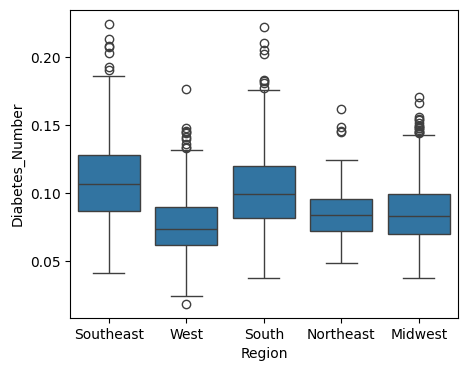

In [24]:
# plot to verify 'Region' column has been added
plt.rcParams["figure.figsize"] = [5, 4]
sns.boxplot(y='Diabetes_Number', x='Region', data=diabetes)

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'Region' to be a categorical variable using `pd.get_dummies` and drop 'State'. Also, we'll drop 'County' because 'CountyFIPS' is already a unique identifier for the county. 

In [25]:
# Drop and get dummies

# create dummy features out of 'Region', which might be related to diabetes rates 
diabetes = pd.get_dummies(diabetes, 
                               columns = ['Region'],  
                               drop_first = True) # drop the first as a reference 

# drop 'County' and 'State' variables
diabetes = diabetes.drop(labels = ['County', 'State'],
                         axis = 1) # which axis tells python we want to drop columns rather than index rows?

# look at first 3 rows of new data frame 
diabetes.head(3)

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,...,sex and age_total population_65 years and over,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,Region_Northeast,Region_South,Region_Southeast,Region_West
0,01001,0.093804,0.244366,0.226902,76.5,55200,0.981341,0.018659,0.768786,0.191395,...,0.145833,0.363297,0.394511,92.1,0.063188,0.082645,False,False,True,False
1,01003,0.080281,0.233255,0.192324,86.6,208107,0.982836,0.017164,0.862662,0.094970,...,0.195404,0.375307,0.405205,92.6,0.090675,0.104730,False,False,True,False
2,01005,0.131875,0.310643,0.210651,76.2,25782,0.986308,0.013692,0.473819,0.475758,...,0.179738,0.423668,0.365488,115.9,0.077729,0.102009,False,False,True,False


## 2. Exploratory Data Analysis

Make at least two figures (feel free to make more) and explain their relevance to the scientific problem. The goal here is to uncover interesting patterns in the data, learn more about the scope of the problem, and communicate these findings to your audience in clear ways.

In [26]:
# duplicate a dataframe for plotting
db_plot = diabetes.copy()

### 2.1. Covariance Heatmap

Among all the variables in the data, three of them are health variables: diabetes, obesity, & physical inactivity.  
Others are demographic variables related to age, sex, & race (two exceptions are total housing units and citizenship). 

Here I plot two covariance heatmaps: 
1. the covariances between diabetes & obesity / pysical inactivity
2. the covariances between diabetes & age / sex / race

<Axes: >

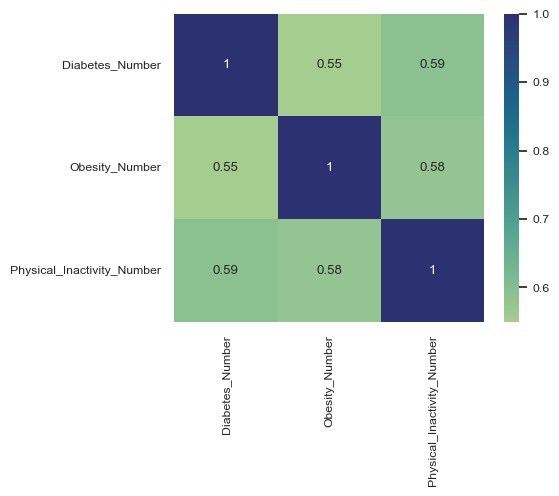

In [27]:
# plot the correlation between diabetes & obesity / pysical inactivity

# set figure size
plt.rcParams["figure.figsize"] = [5, 4]
sns.set(font_scale=0.8)

# create covariance matrix
db_cor_health = db_plot[['Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number']].corr()

# plot covariance using heatmap
sns.heatmap(db_cor_health, annot=True, cmap='crest')

<Axes: >

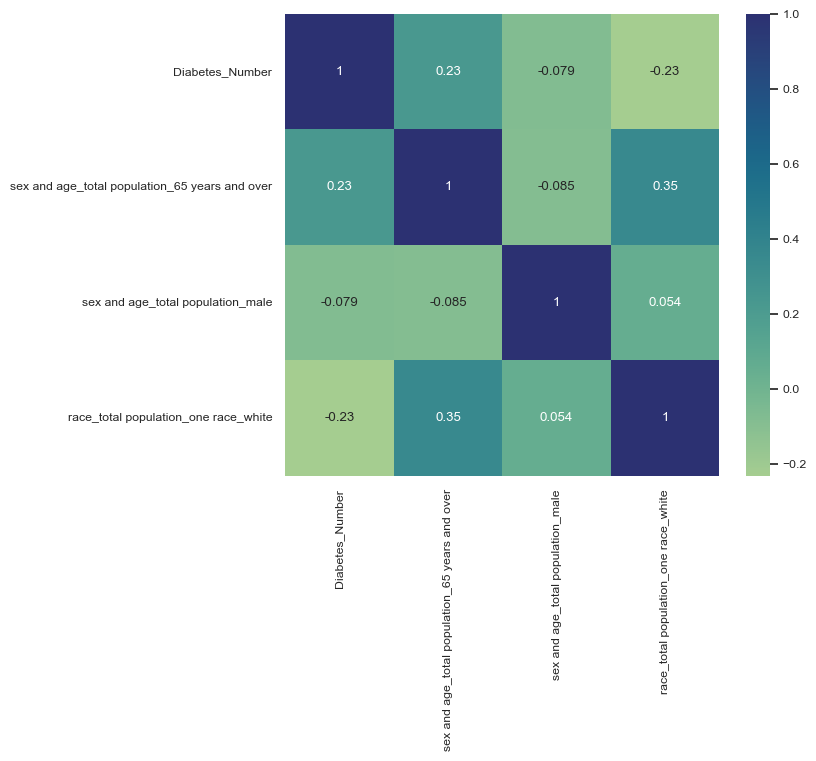

In [28]:
# a quick glimpse into the correlation between diabetes and age / sex / race
plt.rcParams["figure.figsize"] = [7, 6]
sns.set(font_scale=0.8)
db_cor_demogr = db_plot[['Diabetes_Number',
                           'sex and age_total population_65 years and over',
                           'sex and age_total population_male',
                           'race_total population_one race_white']].corr()
sns.heatmap(db_cor_demogr, annot=True, cmap='crest')

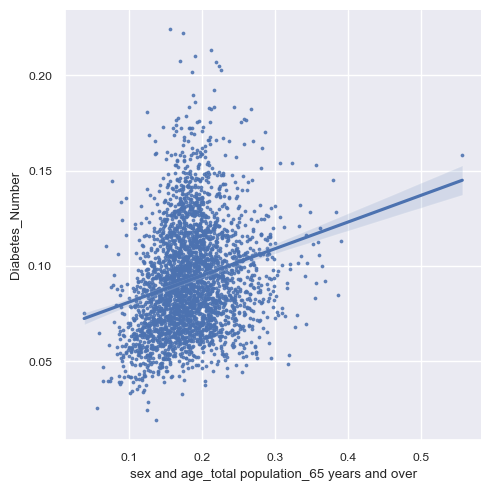

In [29]:
# a further visualization of the correlation between diabetes and age
sns.lmplot(y='Diabetes_Number', x='sex and age_total population_65 years and over',
           data=db_plot, scatter_kws={'s':3})

**EDA #1: Interpretations of section 2.1.**
1. There is a obvious correlation between diabetes and obesity / physical inactivity.
2. Among the demographic variables, age and race seem to correlate with diabetes. I will explore this further in the next section.

### 2.2. Regression Plot

In this section, I explore further the relationships between demographic variables and diabetes.  
I assume race in itself has no correlation with diabetes. However, higher percentage of white in a county may reflect higher socioeconmic status (SES).  
I wonder whether SES has correlation with diabetes. Therefore I use regression plot, controlling the influence of age, as it correlates with diabetes.

In [30]:
# create bins to cut the data
bins = [db_plot['race_total population_one race_white'].min(),
        db_plot['race_total population_one race_white'].median(),
        db_plot['race_total population_one race_white'].max()]

# cut the data by creating a binary variable (1 = percentage of white above the median)
db_plot['above_median_white'] = pd.cut(db_plot['race_total population_one race_white'],
                                 bins, labels=[0,1])

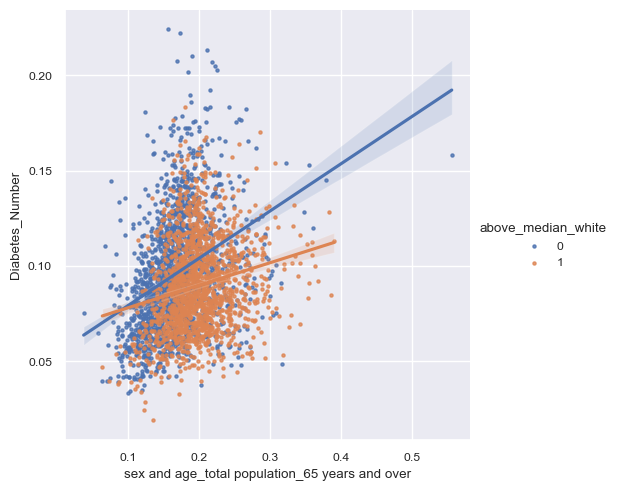

In [31]:
# regression plot 1 
sns.lmplot(y='Diabetes_Number', x='sex and age_total population_65 years and over', data=db_plot, 
           scatter_kws={'s':5}, hue='above_median_white')

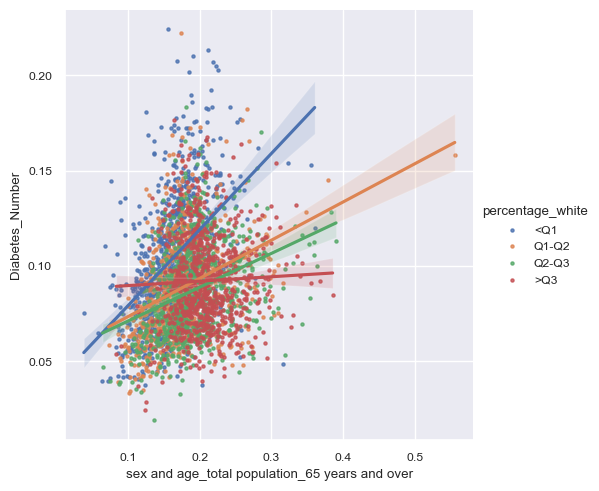

In [32]:
# this time, cut the data into four parts
bins = [db_plot['race_total population_one race_white'].min(),
        db_plot['race_total population_one race_white'].quantile(.25),
        db_plot['race_total population_one race_white'].median(),
        db_plot['race_total population_one race_white'].quantile(.75),
        db_plot['race_total population_one race_white'].max()]

db_plot['percentage_white'] = pd.cut(db_plot['race_total population_one race_white'],
                                 bins, labels=['<Q1', 'Q1-Q2', 'Q2-Q3', '>Q3'])

# regression plot 2 
sns.lmplot(y='Diabetes_Number', x='sex and age_total population_65 years and over', data=db_plot, 
           scatter_kws={'s':5}, hue='percentage_white')

**EDA #2: Interpretations of section 2.2.**
1. Although there is a correlation between age and diabetes in general, the specific patterns differ considering a county's percentage of white residents.
2. Specifically, as shown in regression plot 1, in counties with above-median percentage of white residents (which, in my exploration, is viewed as a reflection of higher SES), the percentage of diabetes tend to be lower, given the same percentage of residents older than 62. 
3. Cutting the percentage of white by quantile as shown in regression plot 2, the stark difference between group 1 (<Q1) and group 4 (>Q3) is noteworthy.

## 3. Prepare to Fit Models

### 3.1. Finalize Data Set

In [33]:
# create y dataframe 
y = diabetes['Diabetes_Number']

# create X dataframe (include everything except "Diabetes_Number", our target, and "race alone or in combination with one or more other races_total population")
X = diabetes.drop(['Diabetes_Number', 'race alone or in combination with one or more other races_total population'],
                 axis=1)

In [34]:
# Feature selection

X = X[['Obesity_Number', 'Physical_Inactivity_Number',
       # select health variables: obesity & physical inactivity
       'total housing units', 'race_total population',
       # select housing units & total population
       'race_total population_one race_white', 'race_total population_one race_black or african american',
       'race_total population_one race_american indian and alaska native', 'race_total population_one race_asian',
       'race_total population_one race_native hawaiian and other pacific islander',
       'race_total population_two or more races',
       # select race variables but not subcategory (e.g. 'indian', 'chinese', 'fillipino' ... in race = 'asian')
       # skip selecting 'some other race' to avoid multicollinearity
       'hispanic or latino and race_total population_hispanic or latino (of any race)',
       # select hispanic or latino identity
       'sex and age_total population_median age (years)',
       # select median age
       # skip selecting 'citizen' for the number is pretty close to '18 years and over' which is selected below
       'sex and age_total population_sex ratio (males per 100 females)', 
       'sex and age_total population_18 years and over', 'sex and age_total population_18 years and over_sex ratio (males per 100 females)',
       'sex and age_total population_65 years and over', 'sex and age_total population_65 years and over_sex ratio (males per 100 females)',
       # select age and sex ratio
       'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_West'
       # select region (note that there are five regions but 'Midwest' is dropped when getting dummies, serving as reference)
      ]]
X.head(3)

,Obesity_Number,Physical_Inactivity_Number,total housing units,race_total population,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_two or more races,...,sex and age_total population_median age (years),sex and age_total population_sex ratio (males per 100 females),sex and age_total population_18 years and over,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over,sex and age_total population_65 years and over_sex ratio (males per 100 females),Region_Northeast,Region_South,Region_Southeast,Region_West
0,0.244366,0.226902,0.422373,55200,0.768786,0.191395,0.002880,0.010290,0.000580,0.018659,...,37.8,94.9,0.757808,92.1,0.145833,76.5,False,False,True,False
1,0.233255,0.192324,0.537920,208107,0.862662,0.094970,0.007314,0.008073,0.000043,0.017164,...,42.8,94.6,0.780512,92.6,0.195404,86.6,False,False,True,False
2,0.310643,0.210651,0.462997,25782,0.473819,0.475758,0.002793,0.003724,0.000039,0.013692,...,39.9,113.3,0.789155,115.9,0.179738,76.2,False,False,True,False


<Axes: >

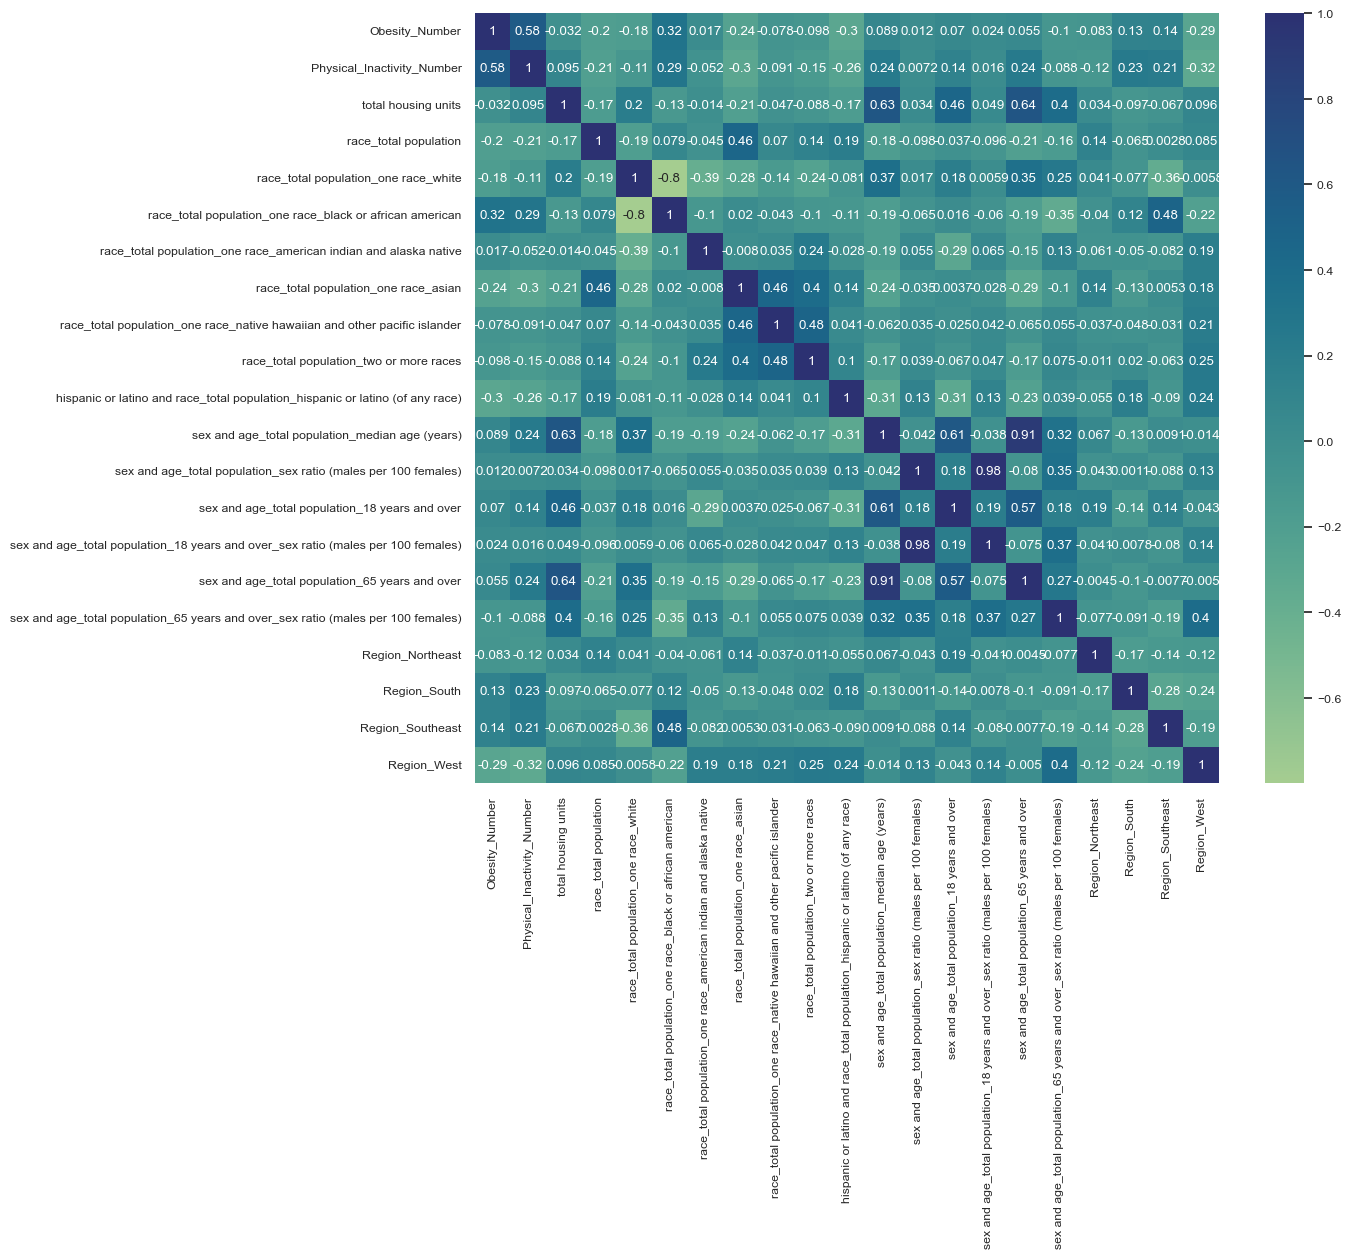

In [35]:
# check correlations

plt.rcParams["figure.figsize"] = [12, 10]
sns.set(font_scale=0.8)

sns.heatmap(X.corr(), annot=True, cmap='crest')

In [36]:
X.head(3).transpose()

,0,1,2
Obesity_Number,0.244366,0.233255,0.310643
Physical_Inactivity_Number,0.226902,0.192324,0.210651
total housing units,0.422373,0.53792,0.462997
race_total population,55200,208107,25782
race_total population_one race_white,0.768786,0.862662,0.473819
race_total population_one race_black or african american,0.191395,0.09497,0.475758
race_total population_one race_american indian and alaska native,0.00288,0.007314,0.002793
race_total population_one race_asian,0.01029,0.008073,0.003724
race_total population_one race_native hawaiian and other pacific islander,0.00058,0.000043,0.000039
race_total population_two or more races,0.018659,0.017164,0.013692


In [37]:
# drop highly correlated variables
X = X.drop(labels=['sex and age_total population_median age (years)',
                   'sex and age_total population_sex ratio (males per 100 females)'],
          axis=1)

In [38]:
# rename the columns
X.columns = ['obesity_%','physical inactivity_%',
             'housing units_%','total population',
             'race_white_%','race_black or african american_%','race_indian and alaska native_%',
             'race_asian_%','race_hawaiian and pacific islander_%','two or more races_%',
             'ethnicity_hispanic or latino_%',
             'age_18 years and over_%','sex ratio_18 years and over',
             'age_65 years and over_%','sex ratio_65 years and over',
             'region_northeast','region_south','region_southeast','region_west']
X.head(3)

,obesity_%,physical inactivity_%,housing units_%,total population,race_white_%,race_black or african american_%,race_indian and alaska native_%,race_asian_%,race_hawaiian and pacific islander_%,two or more races_%,ethnicity_hispanic or latino_%,age_18 years and over_%,sex ratio_18 years and over,age_65 years and over_%,sex ratio_65 years and over,region_northeast,region_south,region_southeast,region_west
0,0.244366,0.226902,0.422373,55200,0.768786,0.191395,0.002880,0.010290,0.000580,0.018659,0.027681,0.757808,92.1,0.145833,76.5,False,False,True,False
1,0.233255,0.192324,0.537920,208107,0.862662,0.094970,0.007314,0.008073,0.000043,0.017164,0.044943,0.780512,92.6,0.195404,86.6,False,False,True,False
2,0.310643,0.210651,0.462997,25782,0.473819,0.475758,0.002793,0.003724,0.000039,0.013692,0.042898,0.789155,115.9,0.179738,76.2,False,False,True,False


### 3.2. Partition Data and Feature Selection

Now, we will partition our data to prepare it for the training process. Ultimately we want to use a 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

Work through partitioning the data into the test/train/validation sets in the chunks below. Be sure to that if you are using Ridge or LASSO, you Standardize the data. Where you do this in the workflow matters so be clear about where you are doing this and why. 

Investigate whether there are any features that you should remove prior to spliting and model fitting. You may also consider using plots and relationships you found in the EDA stage for this question. Be sure to justify your logic. 

In [39]:
# Partition data

# import library
from sklearn.model_selection import train_test_split

# Training/test split
# split the data so that it returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,                 # specify training dataset
                                                    y,                 # specify test dataset
                                                    train_size=0.80,      # specify proportional split for training
                                                    test_size=0.20)       # specify proportional split for test

In [40]:
# Validation split

# train_test_split returns 4 values: X_train, X_test, y_train, y_test, so how do we create a 60-20-20 train-validate-test split? 
X_train, X_validate, y_train, y_validate =  train_test_split(X_train,
                                                             y_train,
                                                             train_size=0.75,
                                                             test_size=0.25)

In [41]:
# check
print("Shape of X train is", X_train.shape)
print("Shape of X_validate is", X_validate.shape)
print("Shape of X_test is", X_test.shape)

Shape of X train is (1866, 19)
Shape of X_validate is (623, 19)
Shape of X_test is (623, 19)


### 3.3. Standardization

**Notes on stardardization:**

Suggestion on whether dichotomous variables should be standardized before regression is somewhat diverged.
I agree with [this article](https://stats.stackexchange.com/questions/414053/standardizing-dummy-variable-in-multiple-linear-regression) that the standardized numbers doesn't make sense.
However, as [another article](https://stats.stackexchange.com/questions/399430/does-categorical-variable-need-normalization-standardization) suggest, standardizing ALL predictors is necessary for "penalized linear approaches like LASSO, ridge, or their hybrid elastic net."  

Below, I comment out the non-dichotomous columns identifier and standardize all the columns instead. 

In [42]:
# Standardization

# Given that we want to only standardize non-dichotomous variables, we need to find a solution that will loop over only the columns we want to standardize. 
# The code below identifies all non-dichotomous variables in our dataset and only standardizes those.

# load library and create instance of Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


## identify non-dichotomous columns we want to transform
#columns = list(X_test.select_dtypes(include=['number']).loc[:, X_test.nunique() > 2])

# for the reason of standardizing all the columns, see the note above
columns = X.columns

# use loop to transform training data for only columns we want to transform
for column in columns:
    X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1)).flatten()

# and validation data
for column in columns:
    X_validate[column] = scaler.fit_transform(X_validate[column].values.reshape(-1, 1)).flatten()

# and test data
for column in columns:
    X_test[column] = scaler.fit_transform(X_test[column].values.reshape(-1, 1)).flatten()

In [43]:
# check 
X_train.describe().transpose()[['mean', 'std', 'min', '50%', 'max']]

,mean,std,min,50%,max
obesity_%,-6.473326e-17,1.000268,-3.446119,0.031367,5.068979
physical inactivity_%,3.160506e-16,1.000268,-3.033831,-0.049737,4.374140
housing units_%,5.045387e-17,1.000268,-1.853355,-0.228173,11.956748
total population,3.807839e-18,1.000268,-0.283546,-0.216078,25.912953
race_white_%,-2.417978e-16,1.000268,-4.585293,0.401954,0.993148
race_black or african american_%,3.807839e-17,1.000268,-0.623625,-0.461748,5.401691
race_indian and alaska native_%,6.187738e-18,1.000268,-0.250787,-0.205189,11.801070
race_asian_%,-3.807839e-17,1.000268,-0.458627,-0.258739,13.209604
race_hawaiian and pacific islander_%,6.663718e-18,1.000268,-0.205196,-0.170856,26.895903
two or more races_%,4.759799e-17,1.000268,-1.197214,-0.204207,13.268021


## 4. Train Models

In this section, train your models. Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem.  

Train each model in the training set, and be sure to tune hyperparameters if appropriate. Report any relevant summary statistics from the training set, including how well each model fits the training data.

### 4.1. Model 1

**MODEL 1 DESCRIPTION: Ordinary Least Square (OLS) Regression**  
- *Basic logic and assumptions*: The reponse variable is continuous, and the plots from exploratory data analysis suggest a somewhat linear relationship between some highly correlated features (obesity or physical inactivity) and the response (diabetes). Therefore, OLS can be a appropriate and intuitive starting point.
- *Pros*: Intuitive and interpretable.
- *Cons*: Assumption of linearity and risk of overfitting.

In [44]:
from sklearn.linear_model import LinearRegression

# create a model
ols_reg = LinearRegression()

# fit the model
ols_model = ols_reg.fit(X_train, y_train)

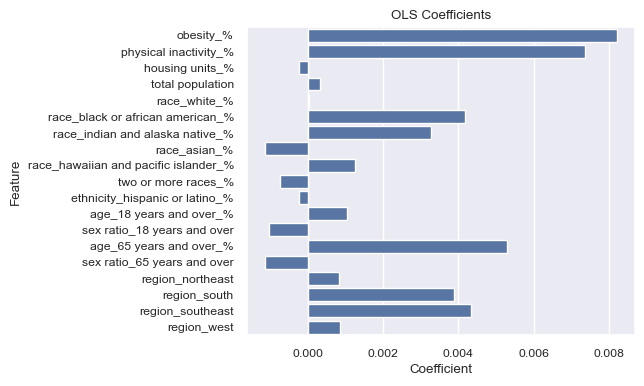

In [45]:
# create a dataframe with the coefficient and feature names
ols_model_coef = pd.DataFrame([ols_model.coef_, X.columns]).T
ols_model_coef.columns = ['Coefficient', 'Feature']

# plot coefficients
plt.rcParams["figure.figsize"] = [5, 4]

ax = sns.barplot(x="Coefficient",                           # add x 
                 y="Feature",                               # add y
                 data=ols_model_coef)                       # specify data

ax.set_title("OLS Coefficients")                            # set title
plt.show()                                                  # show plot

In [46]:
# define function to calculate the root mean squared errror
def rmse(pred, actual):
    return np.sqrt(np.mean((pred-actual)**2))

In [47]:
# print relevant summary statistics from the training set
print('OLS Train R^2:', ols_reg.score(X_train, y_train))
print('OLS Train RMSE:', rmse(ols_model.predict(X_train), y_train))

OLS Train R^2: 0.4856937934574883
OLS Train RMSE: 0.02019723304460577


### 4.2. Model 2

**MODEL 2 DESCRIPTION: LASSO (Least Absolute Shrinkage and Selection Operator) Regression**
- *Basic logic and assumptions*: LASSO is similar to OLS in in basic logic and assumptions. However, its optimization goal include a regularization term (L1 norm), which can shrink some of the coefficients. This conduct prevents the risk of overfitting. 
- *Pros*: Less overfitting and variables selection.
- *Cons*: Less consistency (the value of alpha and which coeeficients are shrunk can be sample specific).

In [48]:
from sklearn.linear_model import LassoCV

# create and fit the model
lasso_reg = LassoCV(cv=5, random_state=224) 
lasso_model = lasso_reg.fit(X_train, y_train)

# note that the alpha is set quite small
lasso_model.alpha_

0.00014157466174992992

In [49]:
# create a dataframe with the coefficient and feature names for plotting
lasso_model_coef = pd.DataFrame([lasso_model.coef_, X.columns]).T
lasso_model_coef.columns = ['Coefficient', 'Feature']

plt.rcParams["figure.figsize"] = [20, 10]

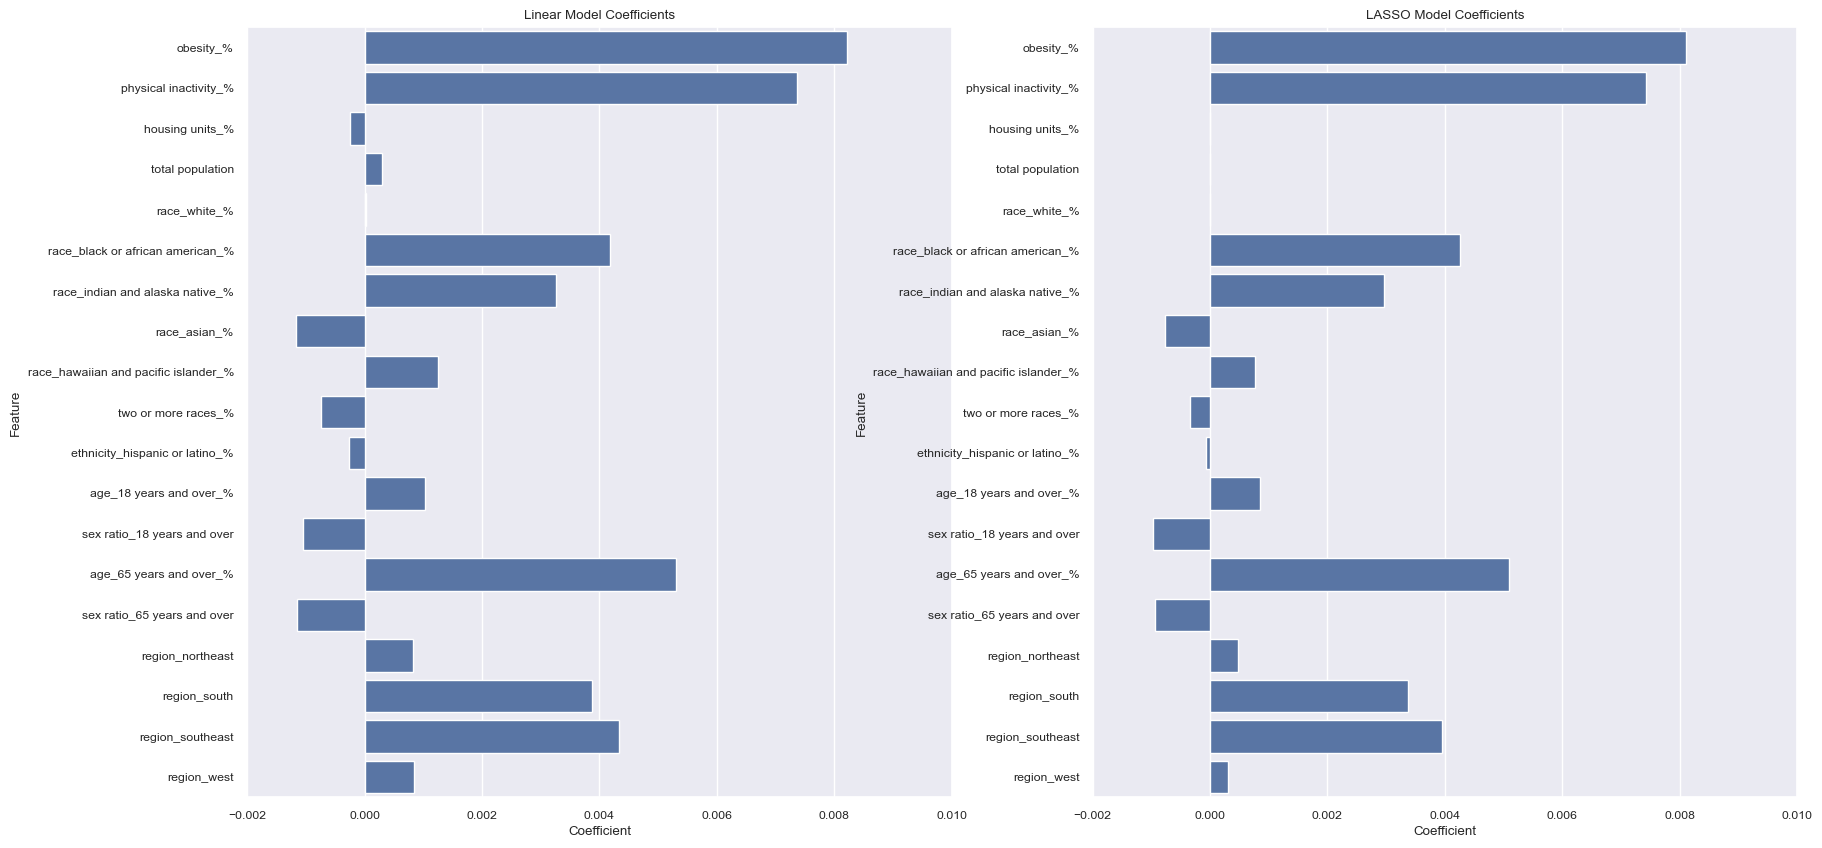

In [50]:
# set the figure 
figure = plt.figure()                            # set the figure space

# plot 1
figure.add_subplot(1,   # sets the number of rows
                   2,   # sets columns,
                   1)   # specifies the following code is for the first plot  

# specify barplot for Linear Model
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=ols_model_coef).set_title("Linear Model Coefficients")
plt.xlim(-0.002,0.010)


# plot 2
# specifies the following code is for the second plot 
figure.add_subplot(1, 2, 2)

# specify barplot for LASSO 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=lasso_model_coef).set_title("LASSO Model Coefficients")
plt.xlim(-0.002,0.010)

# show the plot
plt.show()

In [51]:
# print relevant summary statistics from the training set
print('LASSO Train R^2:', lasso_reg.score(X_train, y_train))
print('LASSO Train RMSE:', rmse(lasso_model.predict(X_train), y_train))

LASSO Train R^2: 0.48487027169908503
LASSO Train RMSE: 0.020213396769379936


### 4.3. Model 3

**MODEL 3 DESCRIPTION: Decision Tree Regressor** 
- *Basic logic and assumptions*: A quite different methods from linear regression. I conduct the basic version of decision tree regressor, using “recursive binary splitting” to grow a tree and then pruning it. 
- *Pros*: Capture non-linear relationship and provide an interpretable outcome that's similar to human decision-making process.
- *Cons*: Greedy algorithm and risk of overfitting.

In [52]:
from matplotlib.pyplot import subplots
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import sklearn.model_selection as skm

# Initialize a Decision Tree Classifier
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [53]:
# use kfold to prune the decision tree
ccp_path = dtr.cost_complexity_pruning_path(X_train, y_train)

kfold = skm.KFold(5, shuffle=True, random_state=224)

grid = skm.GridSearchCV(dtr,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')

dtr_grid = grid.fit(X_train, y_train)

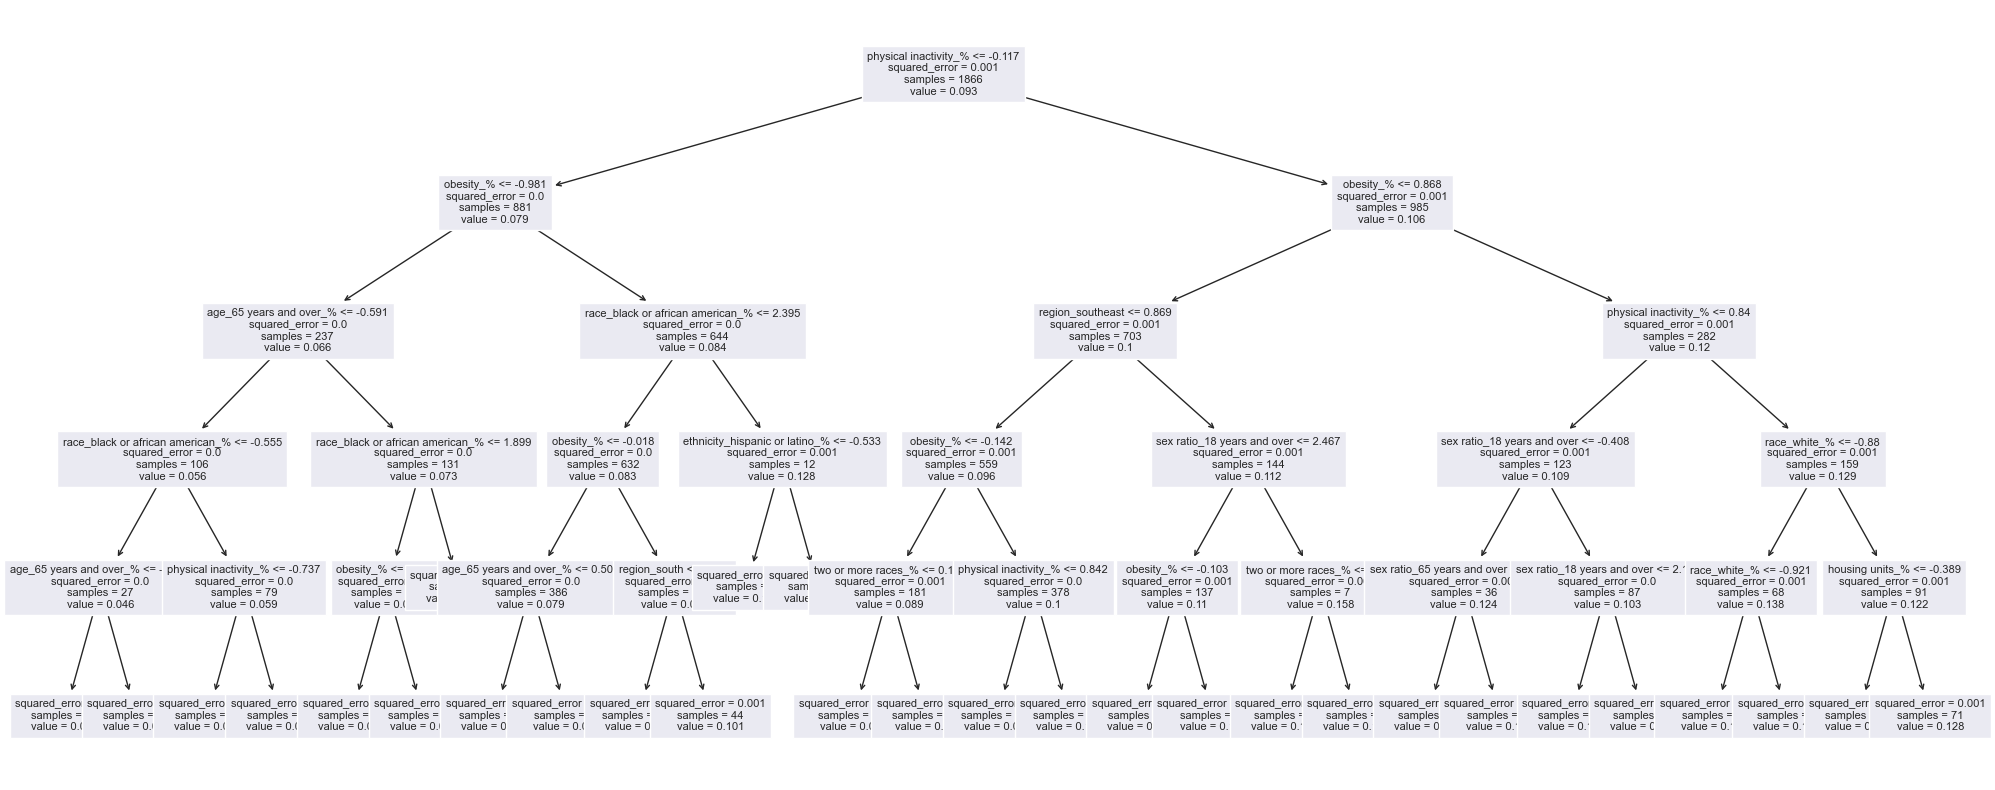

In [54]:
ax = subplots(figsize=(25,10))[1]
plot_tree(dtr_grid.best_estimator_,
          feature_names=list(X_train.columns),
          fontsize = 8,
          ax=ax);

In [55]:
# print relevant summary statistics from the training set
print('DTR Train R^2:', dtr_grid.best_estimator_.score(X_train, y_train))
print('DTR Train RMSE:', rmse(dtr_grid.best_estimator_.predict(X_train), y_train))

DTR Train R^2: 0.5070646034380812
DTR Train RMSE: 0.019773156167198647


## 5. Validate and Refine Models

### 5.1. Predict on the validation set
Using each of the models you trained, predict outcomes in the validation set. Evaluate how well each model did.

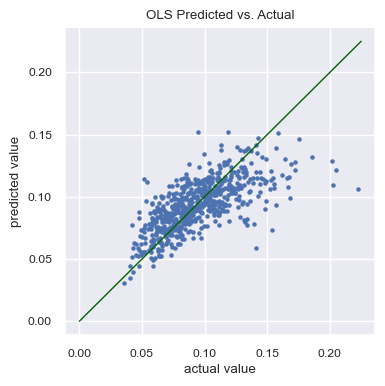

In [58]:
# OLS model 
plt.rcParams["figure.figsize"] = [4, 4]
plt.scatter(y=ols_model.predict(X_validate), x=y_validate, s=5)
plt.title('OLS Predicted vs. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')

# add a 45 degree line
plt.plot([0, 0.225], [0, 0.225], color='darkgreen', linewidth=1)

plt.show()

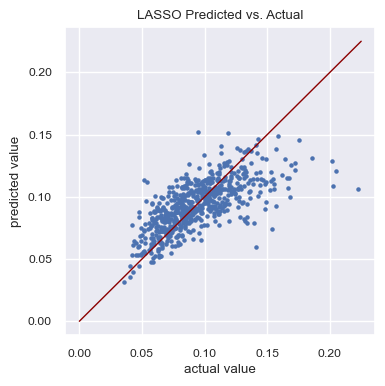

In [61]:
# LASSO model
plt.scatter(y=lasso_model.predict(X_validate), x=y_validate, s=5)
plt.title('LASSO Predicted vs. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.plot([0, 0.225], [0, 0.225], color='darkred', linewidth=1)
plt.show()

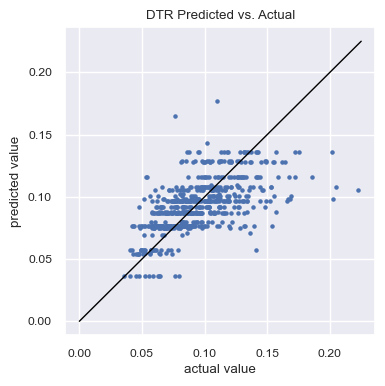

In [62]:
# decision tree model
plt.scatter(y=dtr_grid.best_estimator_.predict(X_validate), x=y_validate, s=5)
plt.title('DTR Predicted vs. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.plot([0, 0.225], [0, 0.225], color='black', linewidth=1)
plt.show()

In [63]:
# OLS
print('OLS Validate R^2:', ols_model.score(X_validate, y_validate))
print('OLS Validate RMSE:', rmse(ols_model.predict(X_validate), y_validate))
print('')

# LASSO
print('LASSO Validate R^2:', lasso_model.score(X_validate, y_validate))
print('LASSO Validate RMSE:', rmse(lasso_model.predict(X_validate), y_validate))
print('')

# DTR
print('DTR Validate R^2:', dtr_grid.best_estimator_.score(X_validate, y_validate))
print('DTR Validate RMSE:', rmse(dtr_grid.best_estimator_.predict(X_validate), y_validate))

OLS Validate R^2: 0.4764057839761595
OLS Validate RMSE: 0.020998083362723498

LASSO Validate R^2: 0.4761084309484188
LASSO Validate RMSE: 0.021004044999850095

DTR Validate R^2: 0.34515664791816436
DTR Validate RMSE: 0.02348285772275111


**Summary**
- *Plot*: While the predictions of OLS and LASSO model look similar, DTR model makes discrete predictions, which, in terms of this data, seems not like a effective strategy.
- *RMSE*: The RMSEs of OLS and LASSO model are similar and both increase slightly (compared to the results from the prediction in the train set). In contrast, the RMSE of DTR model increases significantly, which is anticipated as the tree can cause higher variance.

### 5.2. Predict on the test set

Now, choose your best performing model of the three, ~~select out unimportant feature(s), retrain the model,~~ and then predict on the test set. 

I select the LASSO model, as it conducts variables selection while making tantamount prediction to that of OLS model's.

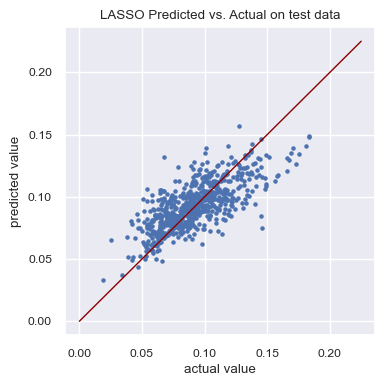

In [65]:
# predict using my best model on test data
plt.scatter(y=lasso_reg.predict(X_test), x=y_test, s=5)
plt.title('LASSO Predicted vs. Actual on test data')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.plot([0, 0.225], [0, 0.225], color='darkred', linewidth=1)
plt.show()

In [67]:
# print R^2 and RMSE 
print('LASSO Test R^2:', lasso_model.score(X_test, y_test))
print('LASSO Test RMSE:', rmse(lasso_model.predict(X_test), y_test))

LASSO Test R^2: 0.5355000561953525
LASSO Test RMSE: 0.018322031453440267


### 5.3. Impement a cross-validation approach

Finally, implement a cross-validation approach for your best model and evaluate the results.

In [68]:
# standardize X dataset

X_sd = X.copy()
columns = X.columns

# use loop to transform training data for only columns we want to transform
for column in columns:
    X_sd[column] = scaler.fit_transform(X_sd[column].values.reshape(-1, 1)).flatten()

In [69]:
from sklearn.model_selection import cross_val_score

# create a KFold object with 5 splits 
folds = skm.KFold(n_splits = 5, shuffle = True, random_state = 224)

# calculate the scores using CV
scores = cross_val_score(estimator=lasso_reg, 
                         X = X_sd, 
                         y = y, 
                         scoring='neg_mean_squared_error', 
                         cv=folds)
scores  

array([-0.00033767, -0.00038738, -0.0004761 , -0.00047035, -0.00035917])

In [70]:
print('RMSE for each fold:', np.sqrt(-scores))
print('Mean RMSE:',np.sqrt(-scores).mean())

RMSE for each fold: [0.01837576 0.01968199 0.02181964 0.02168747 0.0189518 ]
Mean RMSE: 0.020103332769958064


## 6. Discussion Questions

In this section, insert responses for discussion questions here.

1. What is bias-variance tradeoff? Why is it relevant to machine learning problems like this one?

**YOUR ANSWER HERE:**
- What is bias-variance tradeoff?
    - *Bias* refers to the error introduced by estimating a complex relationship by a simplified model. A model with high bias has systematic errors that cause it to consistently underpredict or overpredict the target values.
    - *Variance* refers to the error introduced by the model's sensitivity to noise in the training data. A model with high variance is very flexible and can fit the training data extremely well, but it cannot generalize well to test data.
    - The *tradeoff* refers finding a balance between bias and variance in order to build a model that can not only predict the existing data well but also generalize to unseen data.
- Why is it relevant to machine learning problems like this one?
    -  Model training: The tradeoff between bias and variance is considered when tuning the hyperparameter during the model training process. For example, the L1 norm of the LASSO and the maximum depth of the decision tree.
    -  Model selection: The selection of models depends on how well it predicts on the validation data, but not on the training data. In this way, a model which fits the traning data extremely well will not be selected if it fails to generalize to validation data.
    -  Cross-Validation: In addition, k-fold CV is used to estimate the selected model's bias and variance. This helps in evaluating its generalization performance.

2. Define overfitting, and why it matters for machine learning. How can we address it?

**YOUR ANSWER HERE:**
- What is overfitting and why it matters for machine learning?
    - *Overfitting* refers to what happends when a model has low bias but high variance. In other words, an overfit model has learned the training data so well that it will not work well on new, unseen data.
    - It matters for machine learning mainly because it reduces the predicability of a model, while making accurate prediction in real-world applications is one of the main goal of applying machine learning methods. Besides, an overfitting model can be hard to interpret because the patterns it captures can be just noise of that specific sample.
- How can we address overfitting?
    - Traditionally, social scientists use simple models such as OLS that are good for interpretation, while sacrificing some prediction power. And the problem of overfitting can be mitigated when more data is collected.
    - With machine learning methods, methods such as cross-validation and regularization provide another path to deal with the problem. Essentially, cross-validation divides the training and validating process of a model, assessing its performance on different subsets of the data. Moreover, regularization introduces such as L1 norm to penalize overly complex models to reduce the risk of overfitting when training a model. 

3. Discuss your analysis in 2-3 paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application – why or why not?

**YOUR ANSWER HERE:**
- Findings:
    - The model's predictive performance is reasonable, with an R-squared value of approximately 0.48 in k-fold cross-validation. Notable positive predictors of diabetes rates include health conditions, specifically obesity and physical inactivity rates, as well as demographic factors such as the percentage of Black or American Indian residents and the percentage of residents aged 65 and over.
    - However, it's crucial to interpret these results with caution. The model is based solely on demographic features, thus assuming causation from correlations can lead to the ecological fallacy. Moreover, the percentage of residents of a specific race may serve as a proxy for other underlying factors, such as socioeconomic status (SES). Without data on these additional factors, the model's interpretation may be misleading, even if it provides accurate predictions. 
- Recommendations:
    - Since this program focuses on diabetes prevention rather than treatment, prioritizing counties with high obesity prevalence rates is advisable. Obesity emerges as the most significant predictor of diabetes, and its prevalence can be high even among individuals under the age of 65. Targeting this group may effectively reduce the long-term risk of diabetes.
    - When considering specific features like race, it's tempting to concentrate on areas where certain racial or ethnic groups have higher diabetes rates to ensure equitable access to the program. However, the limitations of using aggregated data to infer individual conditions become evident here. It's possible that the higher diabetes rates in these areas are influenced by other racial or ethnic groups residing there.
- Caution and Thought:
    - These observations underscore the challenge of decision-making based solely on predictive modeling. Understanding potential causal relationships is crucial, while the available data is incomplete (e.g., lacking SES indicators) and operates at an aggregate level. As a result, I lack confidence in deploying the model for a real-world application. This situation also underscores the need for improved data to construct more robust predictive models. 